In [104]:
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson

In [117]:
#Prints a value with its error in scientific notation up to its 2 decimal
def print_scientific(value,error):
    """
    value (float) : the value
    error (float) : the error
    
    Returns:
        (string) : formatted string with the value an error
    """
    base10_error=int(np.floor(np.log10(error)))
    base10_value=int(np.floor(np.log10(np.abs(value))))
    digits=int(base10_value-base10_error+1)
    base=10**base10_value
    string=f"({value/base:.{digits}f} ± {error/base:.{digits}f})·10^{base10_value}"
    return string

## Write data in csv format

In [100]:
data_code = "CV"

data_list = []
with open(f"data/cytc_{data_code}.ocw", "r") as f:
    for i, line in enumerate(f):
        if i == 0:
            pass
        elif i == 1:
            #header = line.strip().split(",")
            header = ["E(V)", "i(A)"]
        else:
            data_list.append([float(x) for x in line.split()])
data_list = np.array(data_list)

data_dict = dict()

for key_idx, key in enumerate(header):
    data_dict[key] = data_list.T[key_idx]

df = pd.DataFrame.from_dict(data_dict, )
df.to_csv(f"data/cytc_{data_code}.csv")
df

,E(V),i(A)
0,-0.200043,-6.796265e-07
1,-0.197601,-6.326294e-07
2,-0.195160,-5.883789e-07
3,-0.192718,-5.569458e-07
4,-0.190277,-5.325317e-07
...,...,...
323,-0.187836,-6.091308e-07
324,-0.190277,-5.993653e-07
325,-0.192718,-6.295776e-07
326,-0.195160,-6.323242e-07


## Data analysis

First all the datas are collected in a list of dataframe and then in a single dataframe 

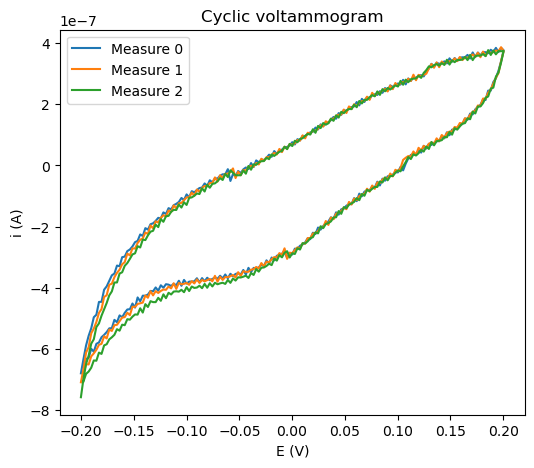

In [127]:
data_cv_list = sorted(glob("data/cytc_CV*.csv"))
dfs = [pd.read_csv(data_cv_path) for data_cv_path in data_cv_list]
df = pd.concat(dfs, ignore_index=True)
# Remove first dummy column
df = df[df.columns[1:]]

# Plot results for different measures
fig, axs = plt.subplots(1,1, figsize=(6,5))
for idx, df0 in enumerate(dfs):
    df0.plot(*df.keys(), ylabel="i (A)", xlabel="E (V)",legend=False, title="Cyclic voltammogram", ax=axs, label=f"Measure {idx}")
plt.legend()
plt.show()

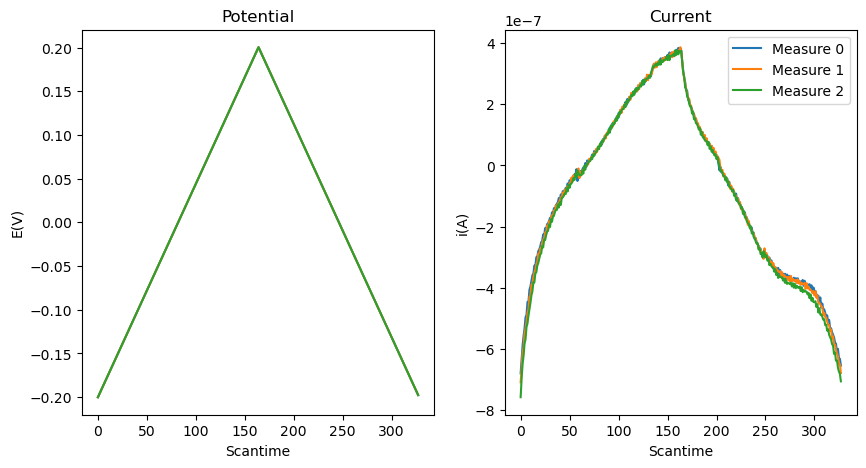

Charge positive voltage (2.008 ± 0.025)·10^-5 C
Charge negative voltage (-4.71 ± 0.16)·10^-5 C
Charge positive current (2.655 ± 0.019)·10^-5 C
Charge negative current (-5.37 ± 0.16)·10^-5 C


In [129]:
titles = ["Potential", "Current"]
y_labels = ["E(V)", "i(A)"]

integral_positive_current = []
integral_negative_current = []

integral_positive_voltage = []
integral_negative_voltage = []


fig, axs = plt.subplots(1,2, figsize=(10,5))
for idx, df0 in enumerate(dfs):
    # Compute the charge 
    positive_charge = df0.loc[df0['E(V)'] > 0 , 'i(A)']
    negative_charge = df0.loc[df0['E(V)'] < 0 , 'i(A)']
    integral_positive_voltage.append(simpson(positive_charge))
    integral_negative_voltage.append(simpson(negative_charge))
    positive_charge = df0.loc[df0['i(A)'] > 0 , 'i(A)']
    negative_charge = df0.loc[df0['i(A)'] < 0 , 'i(A)']
    integral_positive_current.append(simpson(positive_charge))
    integral_negative_current.append(simpson(negative_charge))

    # Plot results
    axs[0].plot(np.arange(len(df0)),df0["E(V)"], label=f"Measure {idx}")
    axs[1].plot(np.arange(len(df0)),df0["i(A)"], label=f"Measure {idx}")

for i, ax in enumerate(fig.axes):
    ax.set(title=titles[i], ylabel=y_labels[i], xlabel="Scantime")

plt.legend()
plt.show()

print(f"Charge positive voltage {print_scientific(np.mean(integral_positive_voltage), np.std(integral_positive_voltage))} C")
print(f"Charge negative voltage {print_scientific(np.mean(integral_negative_voltage), np.std(integral_negative_voltage))} C")
print(f"Charge positive current {print_scientific(np.mean(integral_positive_current), np.std(integral_positive_current))} C")
print(f"Charge negative current {print_scientific(np.mean(integral_negative_current), np.std(integral_negative_current))} C")